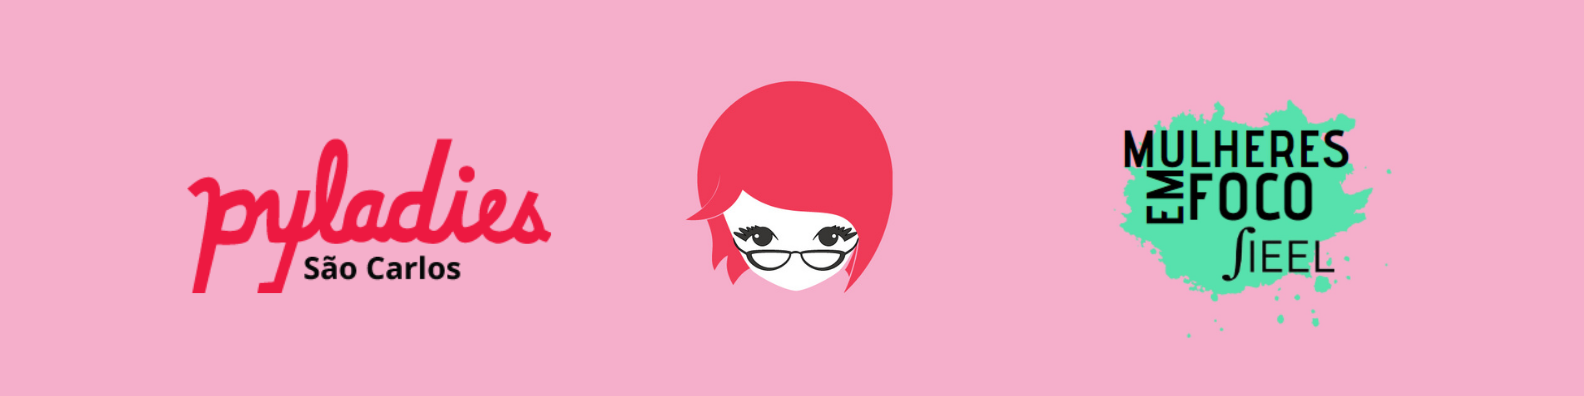

# 1 - Importação das bibliotecas

Primeiramente, vamos carregar os pacotes que serão utilizados neste minicurso:

In [ ]:
# Pacotes para a manipulação de dados
import pandas as pd
import numpy as np

# Pacotes para a visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

Para facilitar deste minicurso, criamos algumas funções auxiliares:

In [ ]:
# Funções auxiliares
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    # Retorna um valor booleano
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')


def print_lin_col(df):
  """
  Função que imprime a quantidade de linhas e colunas do dataframe
  """
  print("O dataset possui:")
  print(f"{df.shape[0]} linhas")
  print(f"{df.shape[1]} colunas")

# 2 - Leitura dos dados

Aqui realizamos a etapa de leitura dos dados que está disponível em:
https://github.com/pythonbrasil/dados/blob/main/dados/python-brasil-2021/README.md

In [ ]:
# Leitura dos dados brutos
df = pd.read_csv()


In [ ]:
# Mostra as 5 primeiras linhas
df.head()

In [ ]:
# Mostra as 5 últimas linhas
df.tail()

Com a ajuda das nossas funções auxiliares, podemos mostrar a quantidade de linhas e colunas do nosso dataset. E em seguida, vamos verificar se existem dados duplicados:

In [ ]:
print_lin_col()

In [ ]:
print_is_duplicated()

OMG! Valores duplicados! O que podemos fazer?

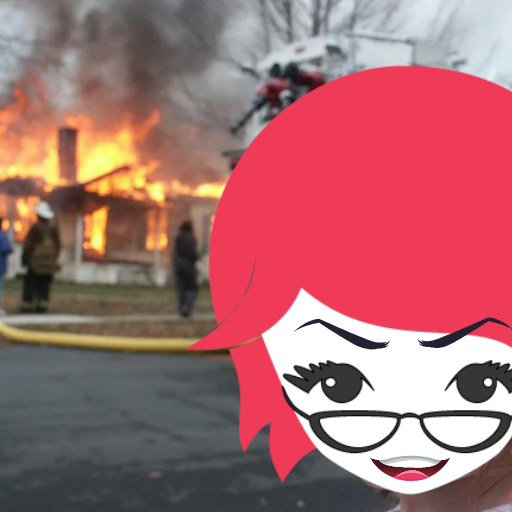

# 3 - Limpeza e tratamento dos dados

É muito importante realizar esta etapa de limpeza e tratamento, pois isso nos garante a qualidade e a organização dos nossos dados.

## 3.1 - Renomeando colunas

Vamos corrigir as colunas que estão com nomes errados:

In [ ]:
col_renomeadas = {'como_voce_se_indentifica': 'como_voce_se_identifica',
                  'como_voce_se_indentifica_se_outro': 'como_voce_se_identifica_se_outro'}

df.rename(columns= col_renomeadas, inplace = True)

## 3.2 - Remoção de dados duplicados

Vamos remover os dados duplicados usando o método ```.drop_duplicates()```. Vamos armazenar em uma nova variável chamada ```df1```, cujo o motivo será explicado mais pra frente:

In [ ]:
# Remove as linhas duplicadas
df1 = df.drop_duplicates()

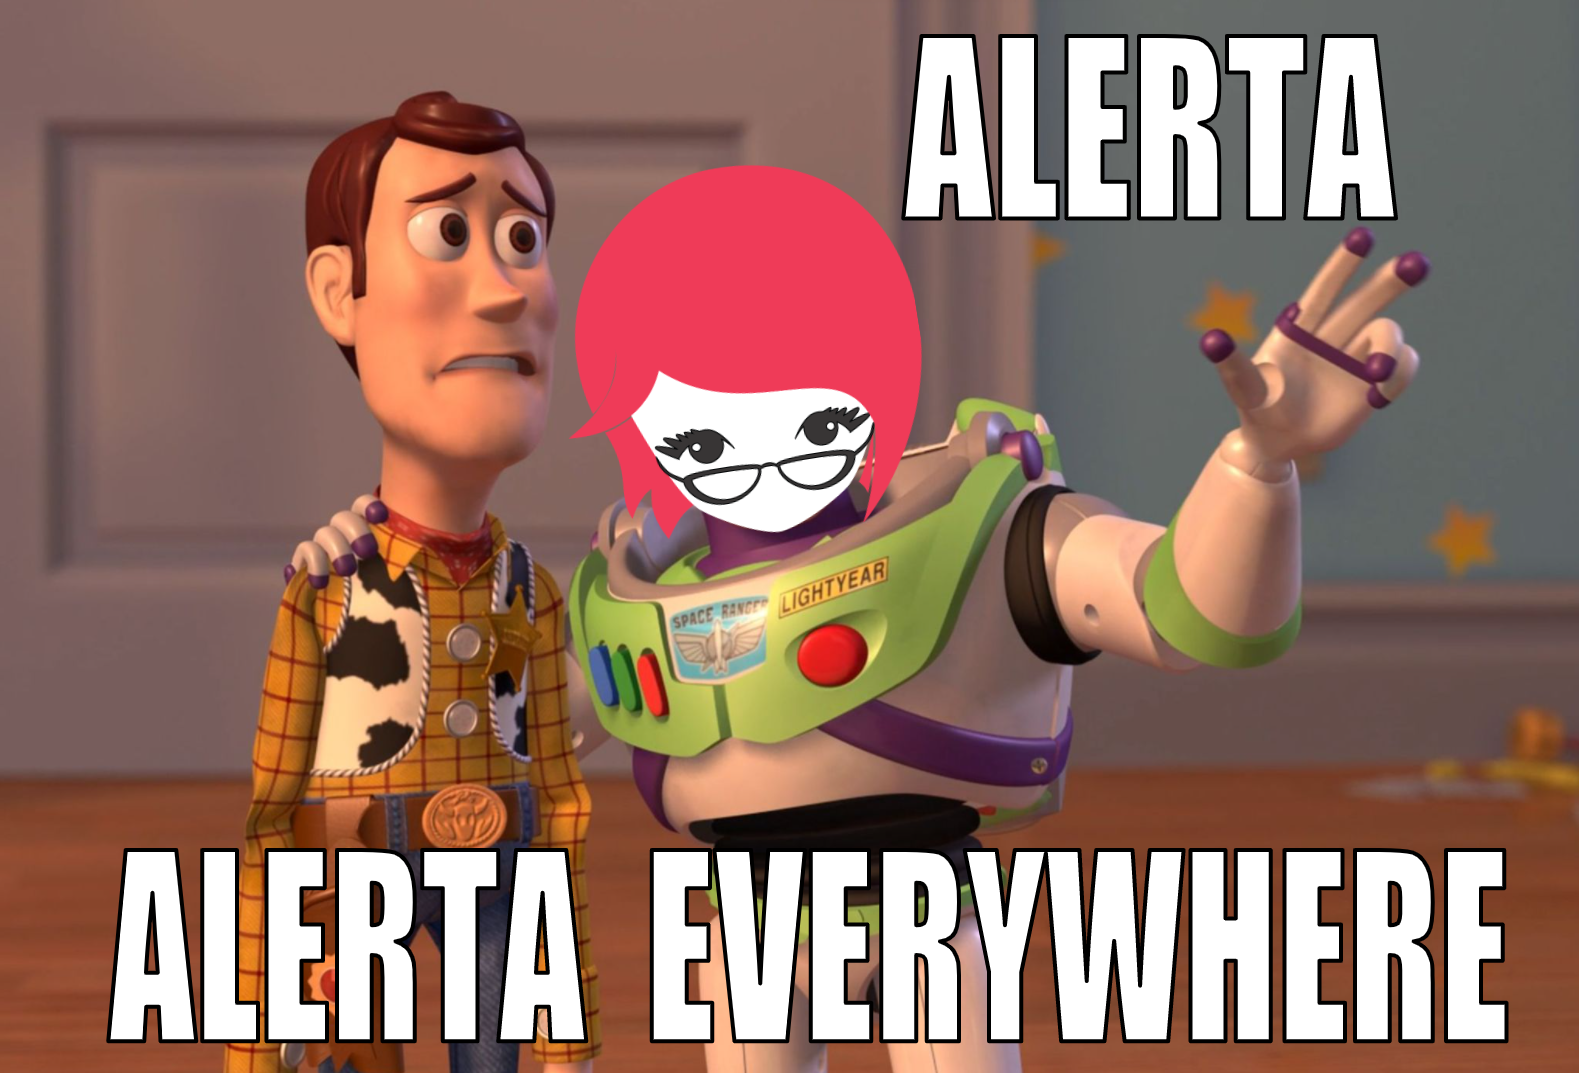

Aaah! Não podemos nos esquecer de resetar os índices, pois tratando-se de um grande volume de dados podemos nos perder facilmente. Perceba como isto pode virar uma bagunça no futuro:

In [ ]:
# Mostra os dados do índice 4066 a 4670
df1.iloc[4066:4071, :]

In [ ]:
# Vamos resetar os índices
df1 = df1.reset_index(drop=True)

OMG! Será que funcionou? Quantas linhas e colunas nós temos depois desta etapa?

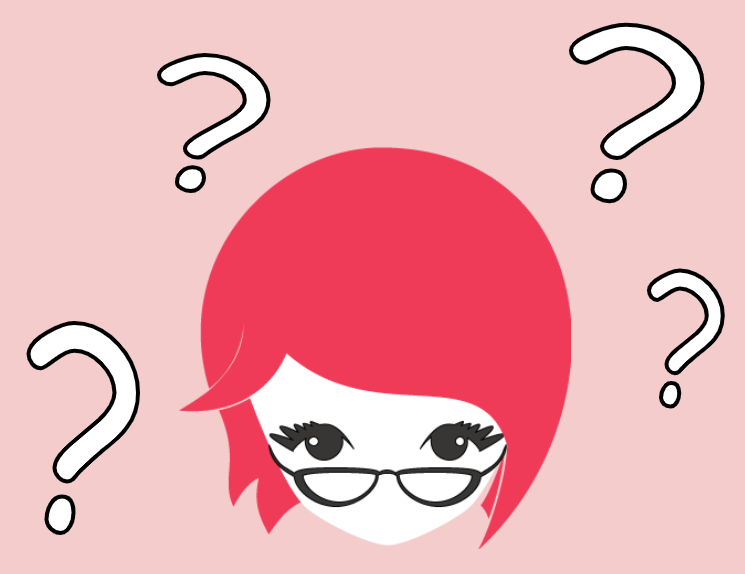

Lembra por que foi necessário criar ```df1```?

É por este motivo que queremos verificar se realmente os dados duplicados foram removidos:

- Antes:

In [ ]:
print_lin_col()

- Depois:

In [ ]:
print_lin_col()

Ufaaaa! Deu certo!

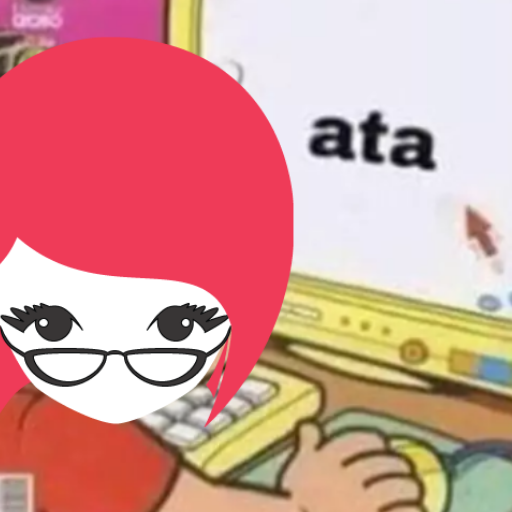

Usando o método ```.info( )```, podemos verificar a quantidade de valores não nulos e o tipo de cada coluna:

In [ ]:
df1.info()

Hmmm... É curioso que algumas colunas possuem 4948 valores não nulos, não é mesmo? Vamos tentar descobrir quais são essas linhas que possuem valores ausentes?

In [ ]:
df1[df1["como_voce_se_define"].isna()]

Olha só! Apenas a linha com o índice 4947 que possui valores NaN! Então, basta removê-la e armazenar o nosso *Dataset* em uma nova variável.

In [ ]:
# Remove a linha com dados inconsistente
df2 = df1.drop(index=4947)
# Vamos resetar os índices
df2 = df2.reset_index(drop=True)

Será que funcionou? Vamos usar novamente a nossa função auxiliar para descobrir:

- Antes:

In [ ]:
print_lin_col()

- Depois:



In [ ]:
print_lin_col()

Vamos conhecer os valores que existem em cada coluna:

In [ ]:
for i in df2.columns:
  # Nome da coluna
  print(i)
  # Valores únicos referente a coluna
  print(df2[i].unique())
  print()

## 3.3 - Deletando colunas

Como vimos anteriormente, existem colunas que possuem valores não significativos que podem nos atrapalhar na hora de plotarmos os gráficos. Dessa forma, podemos deletá-las:

In [ ]:
colunas_desnecessárias = ['como_voce_se_define_se_outro',
                          'como_voce_se_identifica_se_outro',
                          'orientaca_sexual_se_outro',
                          'pessoa_com_necessidade_especifica_se_sim_qual',
                          'comunidade_qual']

df2.drop(columns=colunas_desnecessárias, inplace=True)

## 3.4 - Deletando linhas

Através do método ```.info( )```, note que  coluna 'pais' possui alguns valores ausentes. Vamos investigá-la melhor:

In [ ]:
df2.info()

Podemos usar o método ```.unique( )``` para verificar os valores armazenados:

In [ ]:
df2['pais'].unique()

In [ ]:
# Soma da quantidade dos valores nulos
print(f"Valores NaN: {df2['pais'].isnull().sum()}")

Existem 170 valores nulos (menos de 1%). Portanto, resolvemos excluir essas linhas e armazenamos em ```df3```:

In [ ]:
indice_com_nan = df2.index[df2['pais'].isnull()]
df3 = df2.drop(indice_com_nan)

In [ ]:
df3.info()

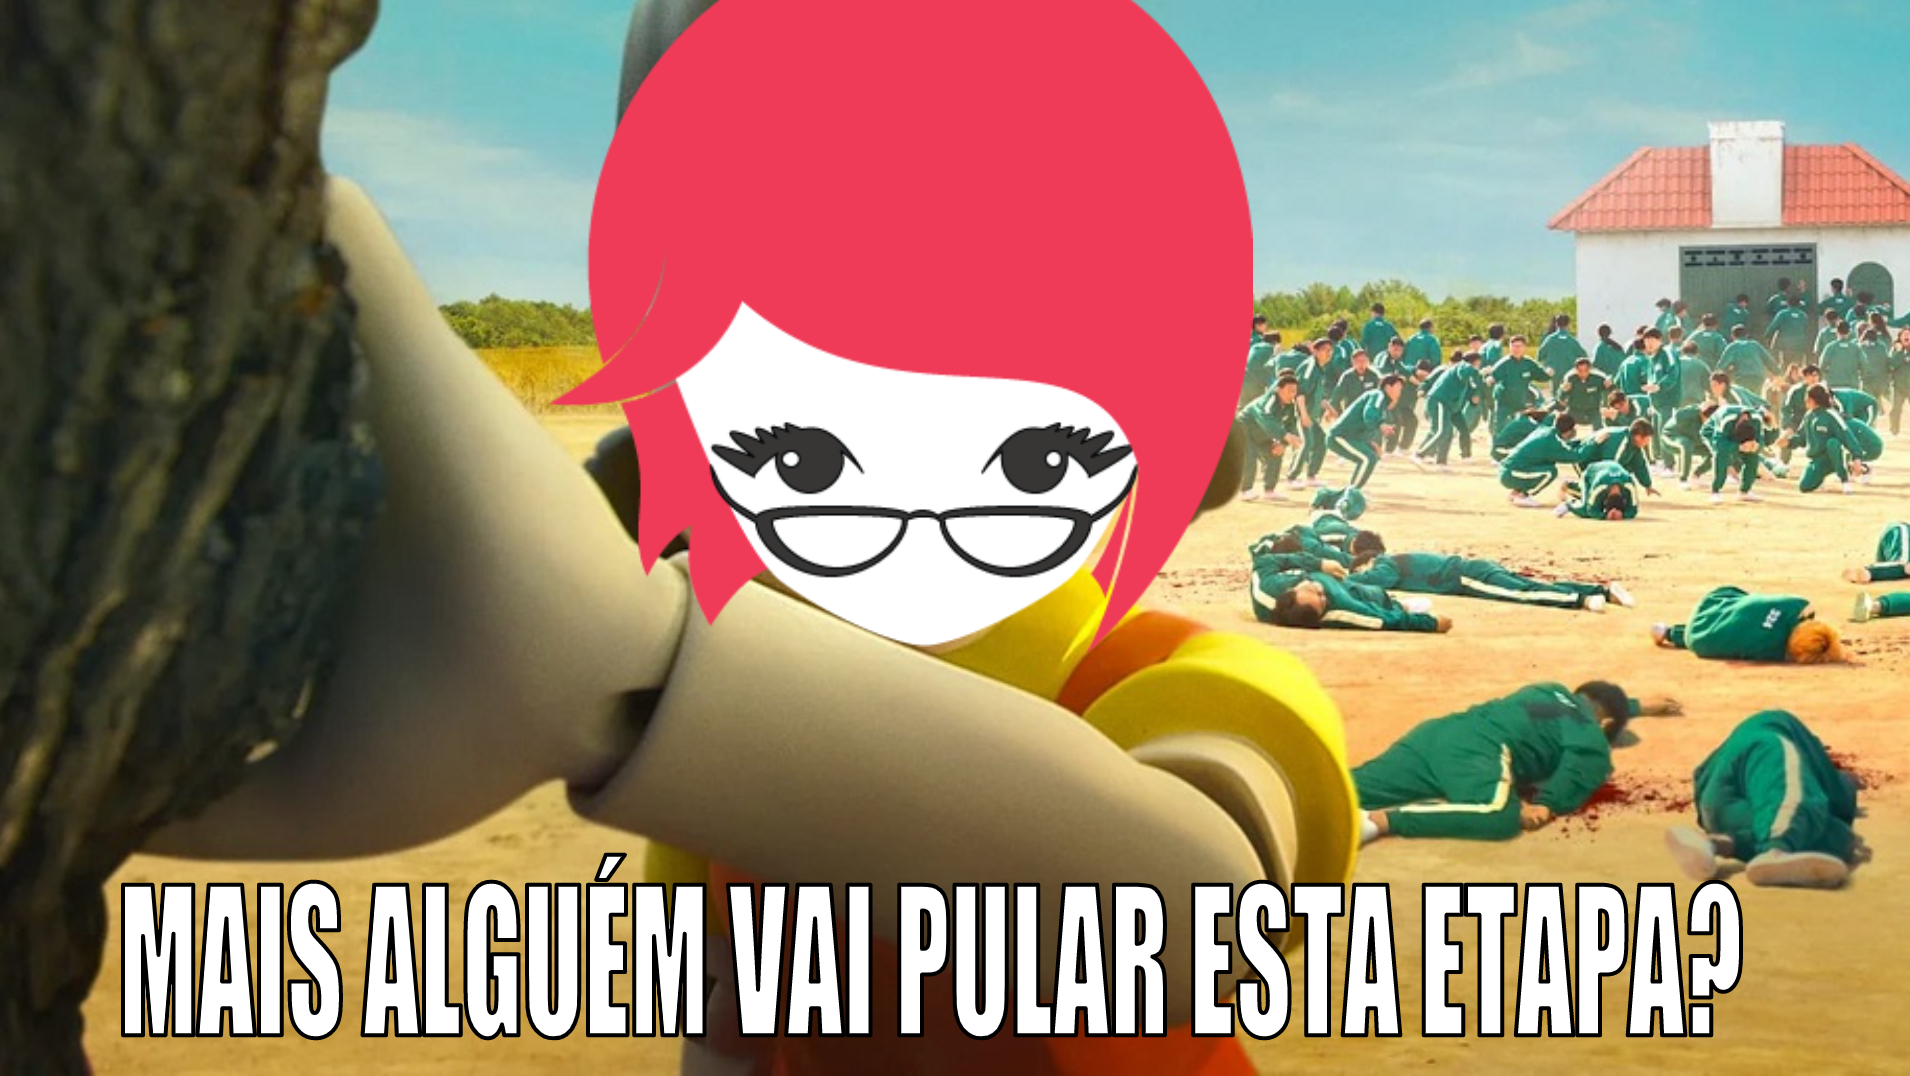

# 4 - Plotando gráficos - Passo a passo

Precisamos entender como se constrói um gráfico. Neste exemplo, faremos um passo a passo para o gráfico de barras que representa quais os tipos raciais das pessoas que participaram do evento.

In [ ]:
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

# Configuramos um tema para o gráfico
sns.set_theme(style="darkgrid")

In [ ]:
# Gráfico de barras na vertical
ax = sns.countplot(x='como_voce_se_define', data=)
plt.show()

Nossa! Está difícil de ler o que está em baixo... :(

Vamos rotacionar em 90º no eixo x por meio do método ```plt.xticks(rotation= )```:

In [ ]:
# Configuramos um tema para o gráfico
sns.set_theme(style="darkgrid")

# Gráfico de barras
ax = sns.countplot(x='como_voce_se_define', data=df3)
# Rotaciona os valores do eixo x
plt.xticks(rotation=)
plt.show()

Hmmm... Já está ficando bem melhor! :)

Que tal colocarmos um título e rotular os eixos?

In [ ]:
# Colocamos uma linha de fundo
sns.set_theme(style="darkgrid")

# Gráfico de barras
ax = sns.countplot(x='como_voce_se_define', data=df3)

# Título
plt.title("Distribuição dos tipos raciais", loc='center')

# Rotulando os eixos
plt.xlabel("")
plt.ylabel("Quantidade de Ocorrências")

# Rotaciona os valores do eixo x
plt.xticks(rotation= 90)
plt.show()

Podemos modificar o tamanho do gráfico por meio do comando ```plt.figure(figsize= (largura,altura))```. Note que em largura e altura precisamos passar um valor numérico.

Além disso, usamos o argumento ```size= ``` para escolher o tamanho da fonte.

In [ ]:
# Colocamos uma linha de fundo
sns.set_theme(style="darkgrid")

# Configuramos o tamanho da figura
plt.figure(figsize= (15,8))

# Gráfico de barras
ax = sns.countplot(x='como_voce_se_define', data=df3)

# Título
plt.title("Distribuição dos tipos raciais", loc='center', size= 18)

# Rotulando os eixos
plt.xlabel("", fontsize= 14)
plt.ylabel("Quantidade de Ocorrências", fontsize= 14)

# Rotaciona os valores do eixo x e aumenta a fonte dos eixos
plt.xticks(rotation= 90, size= 14)
plt.yticks(size= 14)
plt.show()

No método ```.countplot()```, podemos usar o argumento ```palette= ``` para mudar a cor da paleta do gráfico. 

Também podemos deixar o gráfico de barras na horizontal mudando o argumento ```x= ``` para ```y= ``` no mesmo método.

In [ ]:
# Colocamos uma linha de fundo
sns.set_theme(style="darkgrid")

# Configuramos o tamanho da figura
plt.figure(figsize= (15,8))

# Gráfico de barras horizontal
ax = sns.countplot(y='como_voce_se_define', data=df3, palette="Set3")

# Título
plt.title("Distribuição dos tipos raciais", loc='center', size= 18)

# Rotulando os eixos
plt.xlabel("", fontsize= 14)
plt.ylabel("Quantidade de Ocorrências", fontsize= 14)

# Rotaciona os valores do eixo x e aumenta a fonte dos eixos
plt.xticks(rotation= 90, size= 14)
plt.yticks(size= 14)
plt.show()

Para alterar a ordem dos valores, isto é, deixar em ordem crescente ou decrescente usamos o argumento ```order= ``` no método ```.countplot()```.

- Se ```ascending= False``` $⟶$ Ordem decrescente;
- Se ```ascending= True``` $⟶$ Ordem crescente.

In [ ]:
# Colocamos uma linha de fundo
sns.set_theme(style="darkgrid")

# Configuramos o tamanho da figura
plt.figure(figsize= (15,8))

# Ordem decrescente
# order = df3["como_voce_se_define"].value_counts().sort_values(ascending= False).index

# Gráfico de barras
ax = sns.countplot(y= 'como_voce_se_define', data=df3,
                   palette="Set3",
                   order= df3["como_voce_se_define"].value_counts().sort_values(ascending= False).index)

# Título
plt.title("Distribuição dos tipos raciais", loc='center', size= 18)

# Rotulando os eixos
plt.xlabel("", fontsize= 14)
plt.ylabel("Quantidade de Ocorrências", fontsize= 14)

# Rotaciona os valores do eixo x e aumenta a fonte dos eixos
plt.xticks(rotation= 90, size= 14)
plt.yticks(size= 14)
plt.show()

In [ ]:
df3.como_voce_se_define.value_counts()

Usando o argumento ```hue= ``` em ```.countplot()``` podemos mostrar os valores de duas variáveis categóricas. Neste caso, o tipo racial e o gênero.

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='como_voce_se_define', data=df3, 
            hue='como_voce_se_identifica')
plt.xlabel("Como você se define", fontsize=14)
plt.ylabel("Quantidade de Ocorrências", fontsize=14)
plt.xticks(rotation=90, fontsize= 14)
plt.yticks(fontsize= 14);

Se passarmos a nossa variável de interesse no eixo y, podemos obter o gráfico na horizontal:

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='como_voce_se_define', data=df3, 
            hue='como_voce_se_identifica')
plt.ylabel("Como você se define", fontsize=14)
plt.xlabel("Quantidade de Ocorrências", fontsize=14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14);

Também podemos fazer subplots, isto é, criar uma estrutura com vários gráficos ao mesmo tempo. Vamos mostrar um exemplo passando uma lista com os nomes de 3 colunas:

In [ ]:
# Mostra os nomes das colunas
df3.columns

In [ ]:
infos=[]

Uma curiosidade bem legal é que desta vez estaremos usando a paleta de cores chamada viridis, que possui uma escala de cores mais agradável para aquelas pessoas com daltonismo. :)

In [ ]:
fig=plt.figure(figsize=(15,6))

# Título da figura
plt.suptitle('Montando 3 gráficos ao mesmo tempo', fontsize= 18)

# Criando os subplots
for i in range(1, 4):
    # Neste caso, os gráficos estariam representados em ma matriz
    # de 1 linha, 3 colunas. Já o i indica o índice da lista
    # que passamos anteriormente
    plt.subplot(1, 3, i)
    
    # Gráfico de barras
    ax = sns.countplot(x=infos[i-1], data=df3, palette="viridis") 
    
    plt.xticks(rotation=90, fontsize= 14)
    plt.yticks(fontsize= 14)
    
    # Rótulos dos eixos x e y
    plt.xlabel('', fontsize= 14)
    plt.ylabel("Quantidade de Ocorrências", fontsize= 14)
    
    # Título de cada subplot
    plt.title(infos[i-1], fontsize= 14)
    
    # Aumenta o espaçamento em cada subplot
    plt.subplots_adjust(wspace=0.3, 
                    hspace=0.35)
plt.show()

# 5 - Referências bibliográficas

Abaixo, seguem as referências bibligráficas do nosso minicurso:

- Pandas
    - https://pandas.pydata.org/
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
    - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

- Matplotlib:

    - https://matplotlib.org/
    - https://www.delftstack.com/pt/howto/matplotlib/how-to-improve-subplot-size-or-spacing-with-many-subplots-in-matplotlib/#:~:text=Como%20melhorar%20o%20tamanho%20ou%20espa%C3%A7amento%20de%20subpotes%20com%20muitos%20subpotes%20em%20Matplotlib,-Matplotlib%20Matplotlib%20Subplot&text=Poder%C3%ADamos%20utilizar%20m%C3%A9todos%20tight_layout(),com%20muitos%20subquadrantes%20em%20Matplotlib.

    - https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.suptitle.html
    
- Seaborn:
     - https://seaborn.pydata.org/
     - https://seaborn.pydata.org/generated/seaborn.countplot.html
     - https://seaborn.pydata.org/tutorial/color_palettes.html
     - https://seaborn.pydata.org/tutorial.html

Os materiais do minicurso + Material Bônus encontram-se disponíveis em:
https://github.com/AdrianeAkemi/MulheresEmFoco2022

Material elaborado por:
- Akemi (adrianeakemi2@gmail.com)
- Dulce

Ministrantes:
- Amanda Manso (amandamanso7@gmail.com)
- Natália Souza (nta.sjc@gmail.com)

Agradecimento especial ao professor Thiago Marques (Comunidade de Estatística do prof. Thiago Marques)




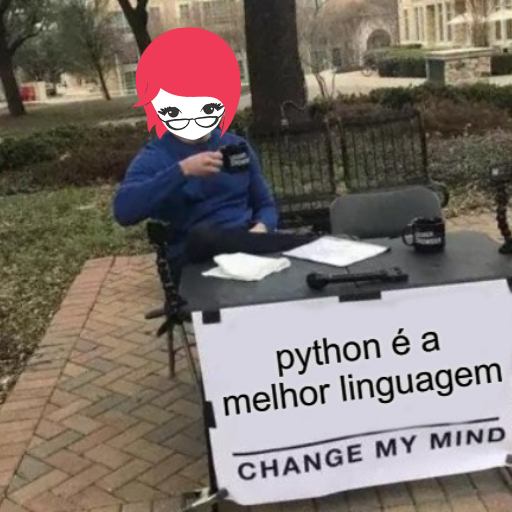</center>